In [215]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

import statsmodels.api as sm
import statsmodels.tsa.api as smt

import datetime


In [216]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

dowjones_closing.iloc[:,0] = dowjones_closing.iloc[:,0].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))

In [218]:
all_dfs = {
    "Monthly sales of company X": sales_of_company_x,
    "Monthly Boston armed robberies": robberies_in_boston,
    "International airline passengers: monthly totals in thousands": airlines_passengers,
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp,
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing,
    "Daily total female births in California": female_births
    }

In [219]:
# plotly setup
fig = make_subplots(rows=3, cols=2, subplot_titles=list(all_dfs.keys()))

# add traces
for i, key in enumerate(all_dfs.keys()):
    col= i % 2
    row = int((i - col) / 2)

    fig.add_trace(go.Scatter(x=all_dfs[key].iloc[:,0], y=all_dfs[key].iloc[:,1],
            name = list(all_dfs.keys())[i], mode = 'lines',), row=row+1, col=col+1)

fig.update_layout(height=800, width=1600)

fig.show()

    Null hypothesis (H0): The time series data is non-stationary.
    Alternate hypothesis (H1): The time series is stationary (or trend-stationary).

In [220]:
 # Dickey-Fuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %.3f, p-value: %.3f' % (dftest[0],dftest[1]))
    print('Critical Values:', end=" ")
    for key, value in dftest[4].items():
      print('%s: %.3f ' % (key, value), end='')
    print('\n')

In [223]:
for i, key in enumerate(all_dfs.keys()):
    print("%s: - Original Series" % key)
    test_stationarity(all_dfs[key].iloc[:,1])

    all_dfs[key].iloc[:,1], lam = boxcox(all_dfs[key].iloc[:,1]) 
    print("%s - The Box Cox transformation (lambda: %.3f):" % (key, lam))
    test_stationarity(boxcox(all_dfs[key].iloc[:,1],0))


Monthly sales of company X: - Original Series
ADF Statistic: -0.645, p-value: 0.860
Critical Values: 1%: -3.537 5%: -2.908 10%: -2.591 

Monthly sales of company X - The Box Cox transformation (lambda: 0.988):
ADF Statistic: -1.141, p-value: 0.699
Critical Values: 1%: -3.530 5%: -2.905 10%: -2.590 

Monthly Boston armed robberies: - Original Series
ADF Statistic: -0.940, p-value: 0.774
Critical Values: 1%: -3.494 5%: -2.889 10%: -2.582 

Monthly Boston armed robberies - The Box Cox transformation (lambda: 0.970):
ADF Statistic: -1.283, p-value: 0.637
Critical Values: 1%: -3.490 5%: -2.887 10%: -2.581 

International airline passengers: monthly totals in thousands: - Original Series
ADF Statistic: -1.383, p-value: 0.590
Critical Values: 1%: -3.482 5%: -2.884 10%: -2.579 

International airline passengers: monthly totals in thousands - The Box Cox transformation (lambda: 0.975):
ADF Statistic: -2.220, p-value: 0.199
Critical Values: 1%: -3.482 5%: -2.884 10%: -2.579 

Mean monthly air te

  Tест *Дики-Фуллера* до и/или после преобразование *Бокса-Кокса* отвергли гипотезу о нестационарности для рядов
  **Mean monthly air temperature (Deg. F) Nottingham Castle** и 
  **Daily total female births in California**. <br /> (Тест Статистика меньше Critical Value (1%) и p-value ≤ 0.05.)<br /> <br /> 
  Попробуем убрать тренд и сезонность остальных рядов с помощью дифференцирования.


In [224]:
import warnings
warnings.filterwarnings('ignore')

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Monthly sales of company X
ADF Statistic: -3.273, p-value: 0.016
Critical Values: 1%: -3.537 5%: -2.908 10%: -2.591 

Monthly Boston armed robberies
ADF Statistic: -5.753, p-value: 0.000
Critical Values: 1%: -3.494 5%: -2.889 10%: -2.582 

International airline passengers: monthly totals in thousands
ADF Statistic: -2.845, p-value: 0.052
Critical Values: 1%: -3.483 5%: -2.884 10%: -2.579 

Weekly closings of the Dow-Jones industrial average
ADF Statistic: -13.027, p-value: 0.000
Critical Values: 1%: -3.472 5%: -2.880 10%: -2.576 



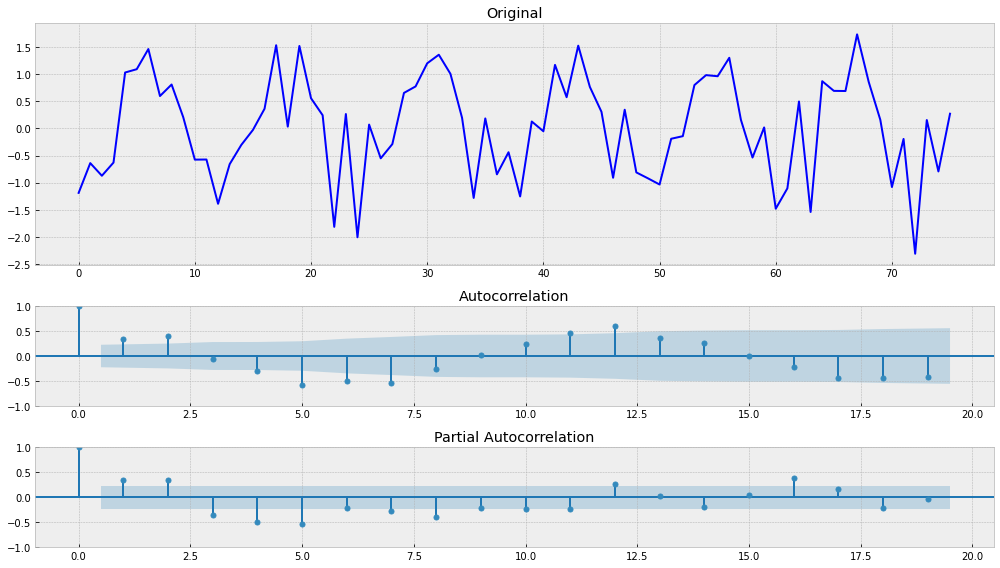

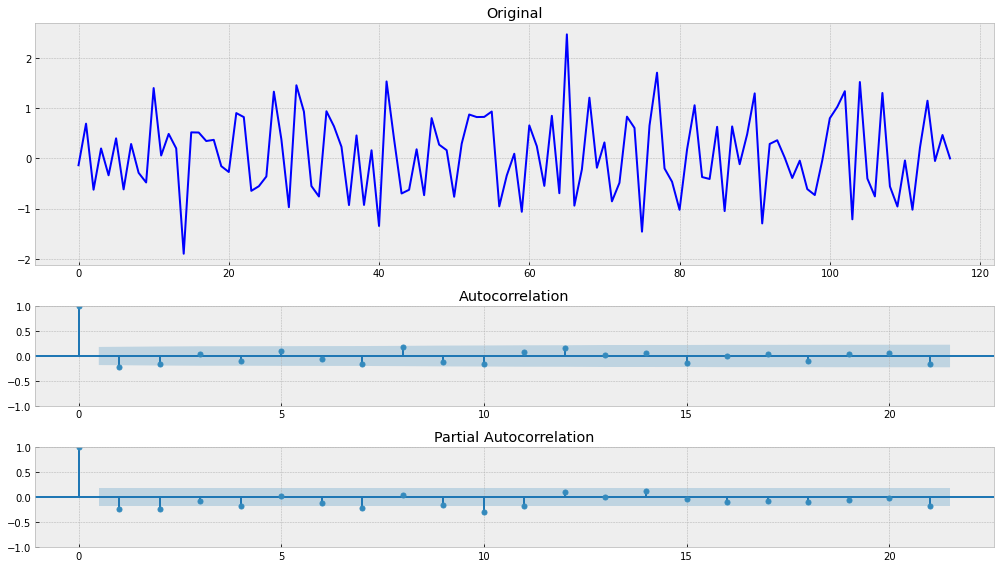

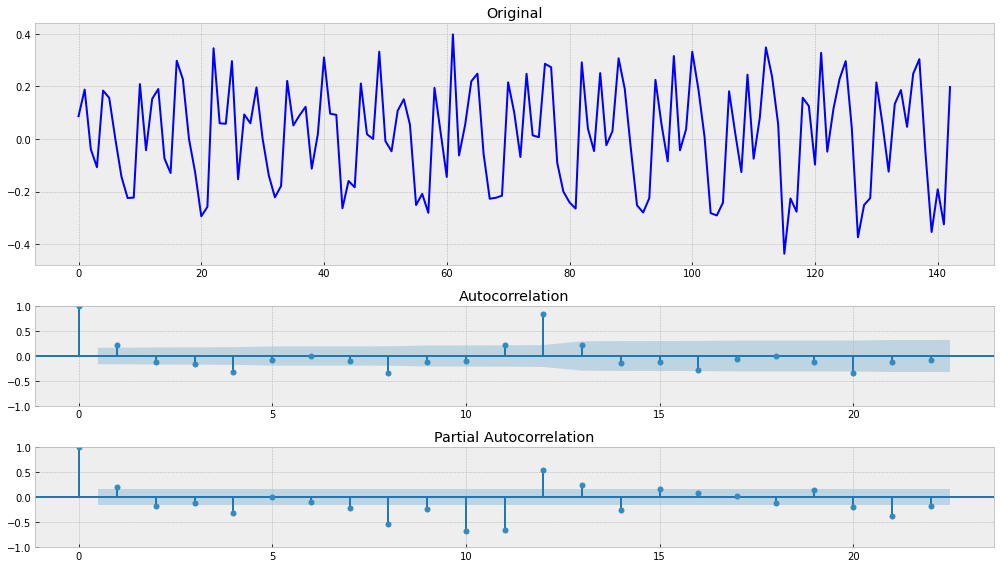

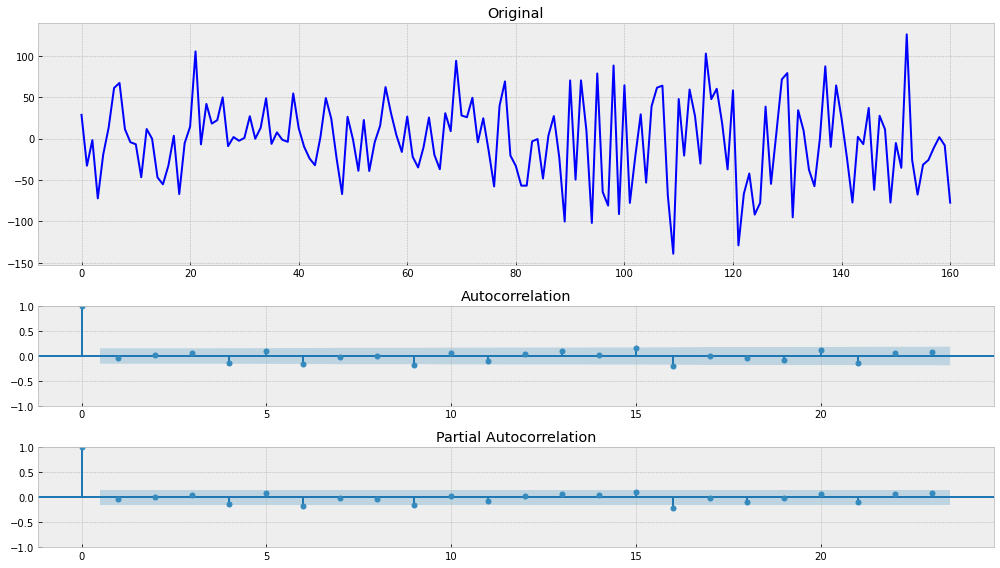

In [225]:
for i, key in enumerate(all_dfs.keys()):
    if key in ["Mean monthly air temperature (Deg. F) Nottingham Castle", "Daily total female births in California"]:
        pass
    else: 
        print(key)
        series = np.array(all_dfs[key].iloc[:,1])
        series = series[1:] - series[:-1]
        test_stationarity(series)
        tsplot(series)

  Видно, что гипотеза о нестационарности отвергнута. Ряды **Monthly Boston armed robberies** и **Weekly closings of the Dow-Jones industrial average** стационарны после преобразования Бокса-Кокса и диффиренцирования. Попробуем убрать сезонность у оставшихся двух.

Monthly sales of company X
ADF Statistic: -2.350, p-value: 0.156
Critical Values: 1%: -3.560 5%: -2.918 10%: -2.597 

International airline passengers: monthly totals in thousands
ADF Statistic: -4.407, p-value: 0.000
Critical Values: 1%: -3.487 5%: -2.886 10%: -2.580 



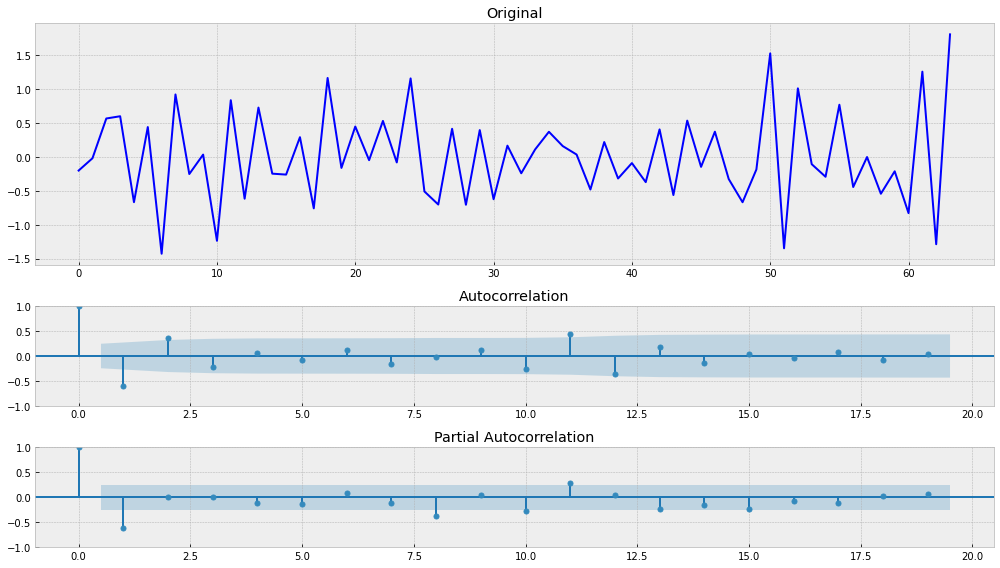

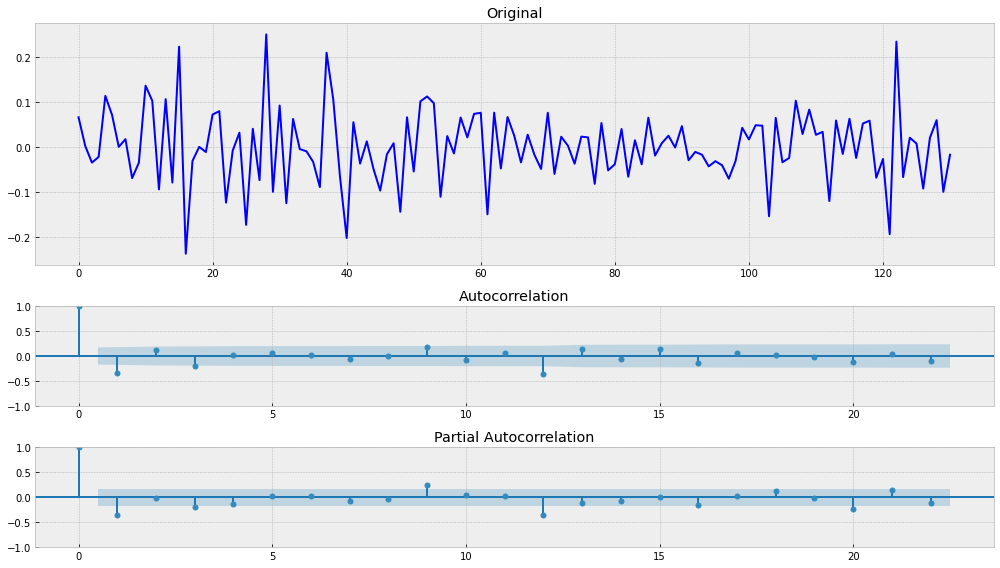

In [226]:
for i, key in enumerate(all_dfs.keys()):
    if key in ["Mean monthly air temperature (Deg. F) Nottingham Castle", "Daily total female births in California", "Monthly Boston armed robberies", "Weekly closings of the Dow-Jones industrial average"]:
        pass
    else: 
        print(key)
        series = np.array(all_dfs[key].iloc[:,1])
        series = series[1:] - series[:-1]
        series = series[12:] - series[:-12]
        test_stationarity(series)
        tsplot(series)

Это сработало на **International airline passengers: monthly totals in thousands**. Графики и тест позволяют отвергнуть H0.
Попытка взять скользящее среднее с окном 4 месяца позволило привести и последний ряд к стационарности:

1.1183826607491087
ADF Statistic: -3.903, p-value: 0.002
Critical Values: 1%: -3.571 5%: -2.923 10%: -2.599 



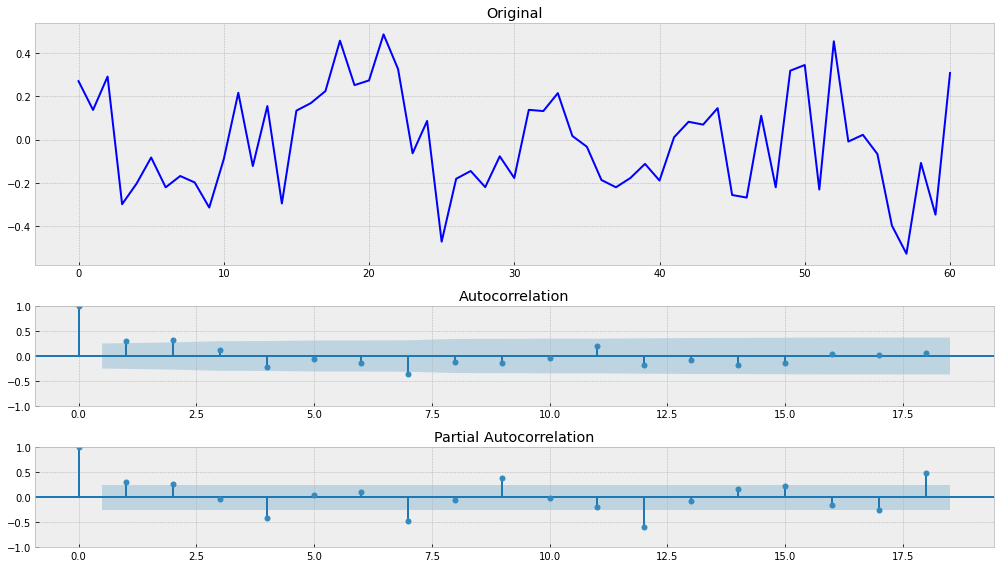

In [272]:
series = all_dfs["Monthly sales of company X"].iloc[:,1]
rolling = series.rolling(window=4) 
rolling_mean = rolling.mean()

series, lam = boxcox(np.array(rolling_mean.dropna()))
print(lam)
series = series[1:] - series[:-1]
series = series[12:] - series[:-12]

test_stationarity(series)
tsplot(series)